#### **CNN for Text Classification**

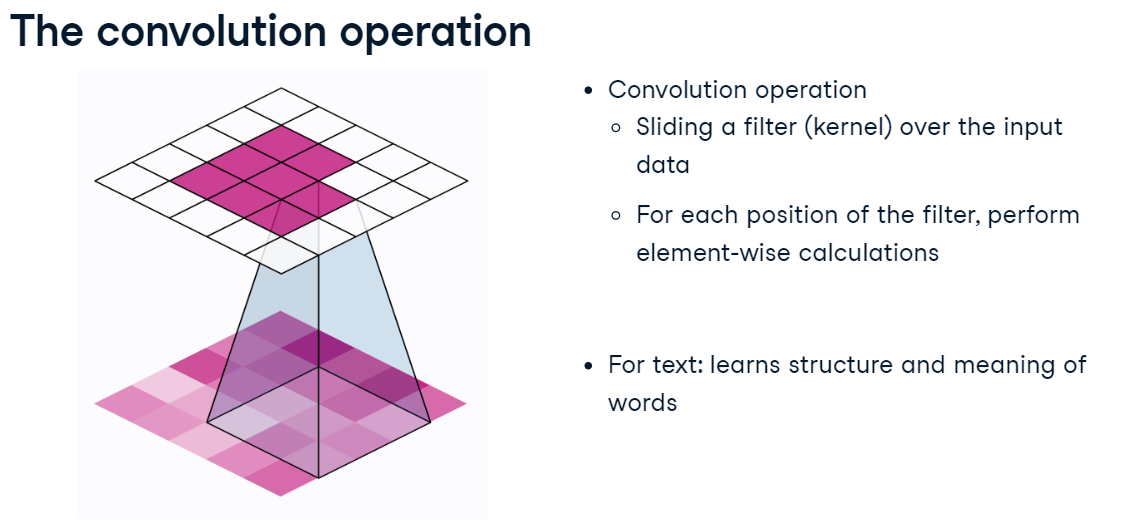

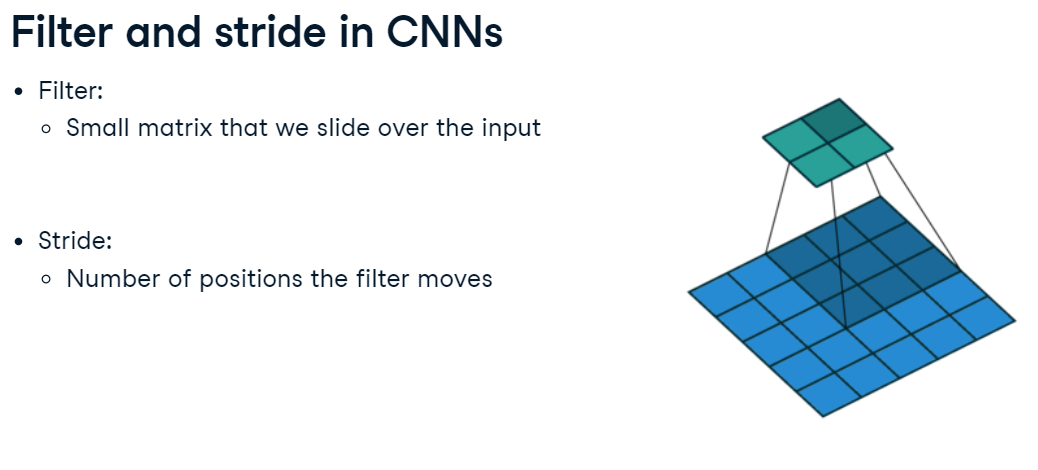


#### **Convolution Architecture for text**

There are 3 components of convolution architecture -
- **Convolutional layer** applies filters to input data (to detect patterns).
- **Pooling Layer** reduces data size while preserving important information.
- **Fully Connected Layer** makes final predictions based on previous layer output.

#### **Making a Sentiment Analysis CNN Model**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class SentimentAnalysisCNN(nn.Module):
    def __init__(self, vocab_size, embed_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.conv = nn.Conv1d(embed_dim, embed_dim, kernel_size=3, stride=1, padding=1)
        # self.pool = ... (skipping pooling for smaller dataset)
        self.fc = nn.Linear(embed_dim, 2)
    
    def forward(self, text):
        embedded = self.embedding(text).permute(0, 2, 1)  # batch_size=0, embedding_size=2, sequence_length=1
        conved = F.relu(self.conv(embedded))
        conved = conved.mean(dim=2)
        return self.fc(conved)



vocab = ['i', 'love', 'this', 'book', 'do', 'not', 'like']
word_to_idx = {word:i for i,word in enumerate(vocab)}
vocab_size = len(word_to_idx)
embed_dim = 10
book_samples = [
    ('The story was captivating and kept me hooked untill the end.'.split(), 1),
    ('I found the characters shallow and the plot was predictable.'.split(), 0)
]
model = SentimentAnalysisCNN(vocab_size, embed_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [ ]:
for epoch in range(10):
    for sentence, label in data:
        model.zero_grad()
        sentence = torch.LongTensor([word_to_idx.get(w, 0) for w in sentence]).unsqueeze(0)
        outputs = model(sentence)
        label = torch.LongTensor([int(label)])
        loss = criterion(outputs, label)
        loss.backward()
        optimizer.step()

In [ ]:
for sample in book_samples:
    input_tensor = torch.tensor([word_to_idx[w] for w in sample], dtype=torch.long).unsqueeze(0)
    outputs = model(input_tensor)
    _, predicted_label = torch.max(outputs.data, 1)
    sentiment = 'Positive' if predicted_label.item()==1 else "Negative"
    print(f'Book Review: {' '.join(sample)}')
    print(f'Sentiment: {sentiment}\n')

Note: we are using Conv1d rather than Conv2d since our input text data is one-dimensional